In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import io
import nltk

In [6]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(".") if isfile(join(".", f))]
files

['How to monitor.gdoc',
 'HS110_kettle.png',
 'HS110_kettle_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json',
 'HS110_lamp_bed.png',
 'HS110_lamp_floor_bedroom.png',
 'HS110_lamp_living_room.png',
 'HS110_lamp_living_room_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json',
 'HS110_laptop_charger.png',
 'HS110_laptop_charger_standby.png',
 'HS110_laptop_charger_standby_ASUS_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json',
 'HS110_monitor.png',
 'HS110_monitor_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json',
 'HS110_monitor_standby.png',
 'HS110_monitor_standby_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json',
 'HS110_oven.png',
 'HS110_refrigerator.png',
 'HS110_refrigerator_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json',
 'HS110_refrigerator_two_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json',
 'HS110_wifi_router_SAGEMCOM_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json',
 'HS110_workstation_two_monitors.png',
 'HS110_workstation_two_monitors_8006226E61D1C1DE22FFA6509

In [7]:
import json
# TODO: Consider if 0W data points should be removed?
dfDict = dict()
filenames = []
for file in files:
    if re.search(r'\.json', file) is not None:
        # From: https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
        with open(file) as json_file:
            data = json.load(json_file)
            filenames.append(json_file.name)
            dfDict[json_file.name] = pd.DataFrame(data=[entry.get('pw') for entry in data if entry.get('pw') > 0.0], index=[entry.get('ts') for entry in data if entry.get('pw') > 0.0])
            print(json_file.name)
            print(dfDict[json_file.name].head(1))

HS110_kettle_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json
                    0
1569354488331  41.195
HS110_lamp_living_room_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json
                   0
1569567966933  6.455
HS110_laptop_charger_standby_ASUS_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json
                    0
1569969796289  11.855
HS110_monitor_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json
                    0
1570088029008  32.313
HS110_monitor_standby_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json
                    0
1570054677620  30.827
HS110_refrigerator_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json
                   0
1569362333544  6.543
HS110_refrigerator_two_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json
                     0
1569954129180  100.413
HS110_wifi_router_SAGEMCOM_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log.json
                    0
1572873238918  10.904
HS110_workstation_two_monitors_8006226E61D1C1DE22FFA65090147F1A1B2CA205-log

	Device: kettle
	Average Pwr: 214.82 W
	Uptime: 1.1 hours
	Total Consumption: 8.55 kWh
	Average Consumption: 0.19891 kWh / min
	Price Estimate: 19.24 kr


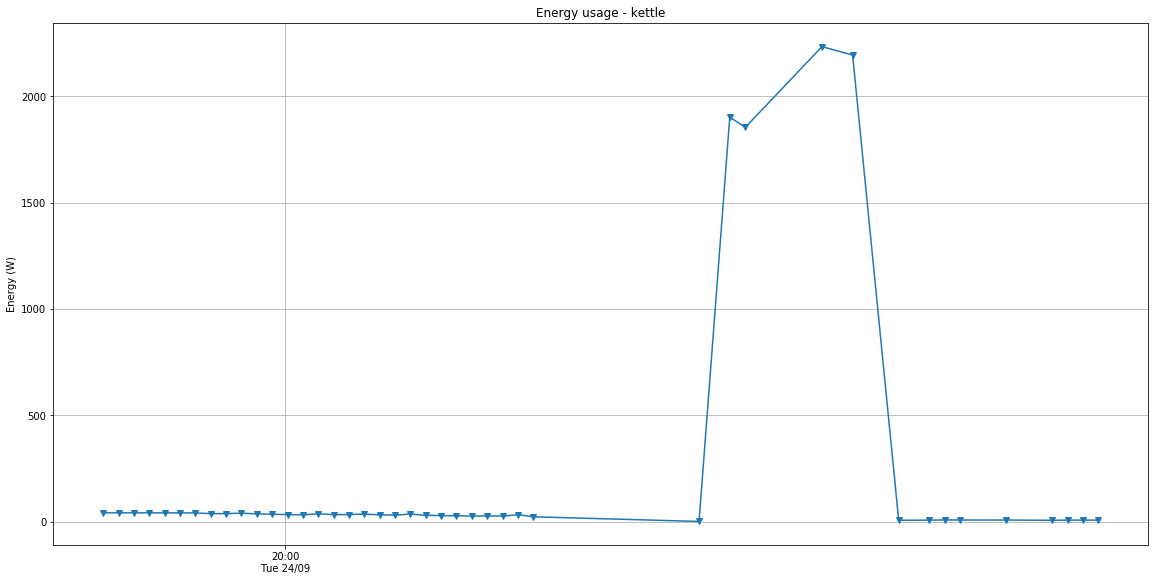

	Device: lamp living room
	Average Pwr: 6.30 W
	Uptime: 4.4 hours
	Total Consumption: 2.25 kWh
	Average Consumption: 0.00143 kWh / min
	Price Estimate: 5.07 kr


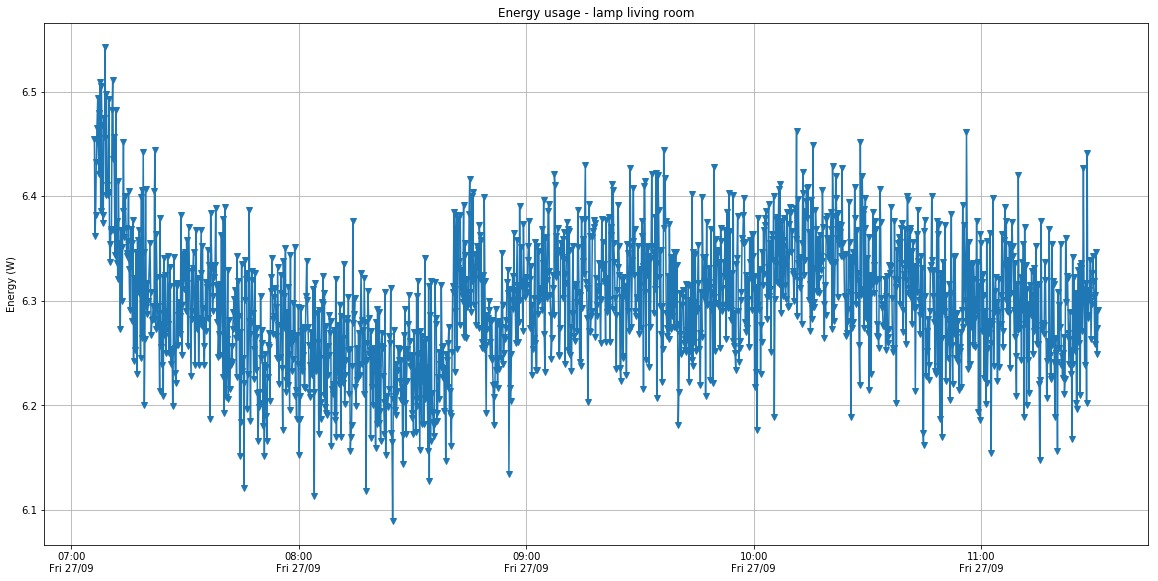

	Device: laptop charger standby ASUS
	Average Pwr: 13.20 W
	Uptime: 6.9 hours
	Total Consumption: 0.76 kWh
	Average Consumption: 0.00192 kWh / min
	Price Estimate: 1.70 kr


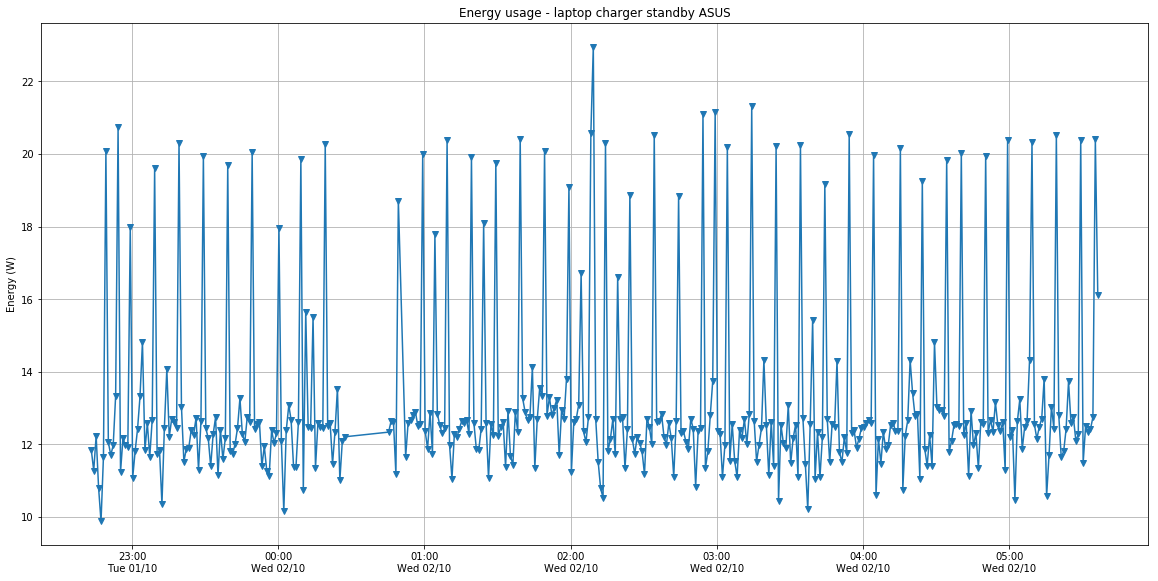

	Device: monitor
	Average Pwr: 28.17 W
	Uptime: 8.2 hours
	Total Consumption: 1.69 kWh
	Average Consumption: 0.00344 kWh / min
	Price Estimate: 3.81 kr


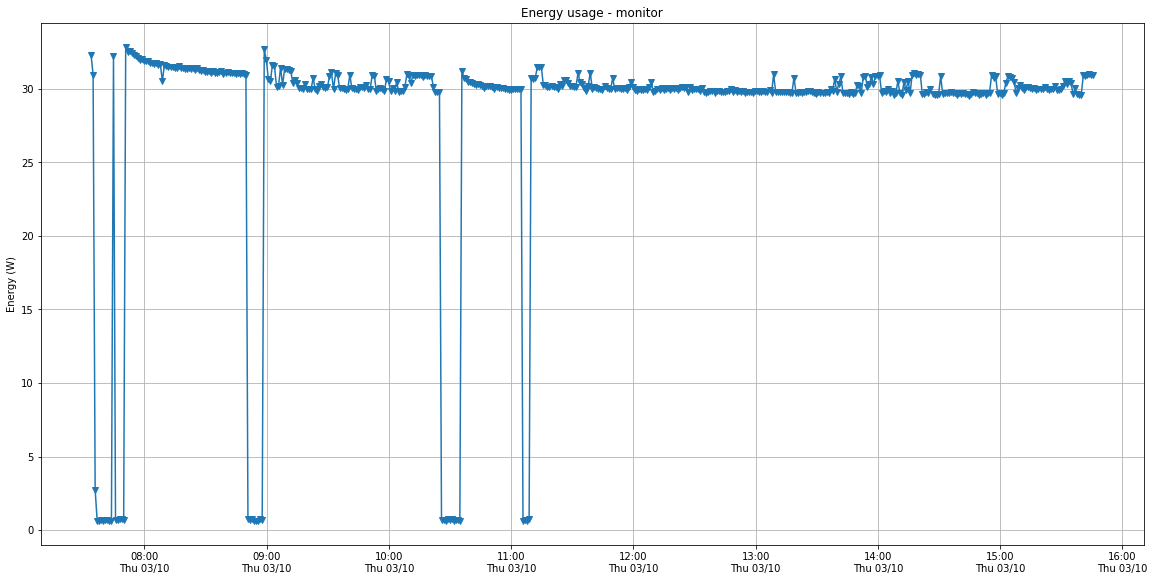

	Device: monitor standby
	Average Pwr: 1.19 W
	Uptime: 9.1 hours
	Total Consumption: 0.07 kWh
	Average Consumption: 0.00013 kWh / min
	Price Estimate: 0.16 kr


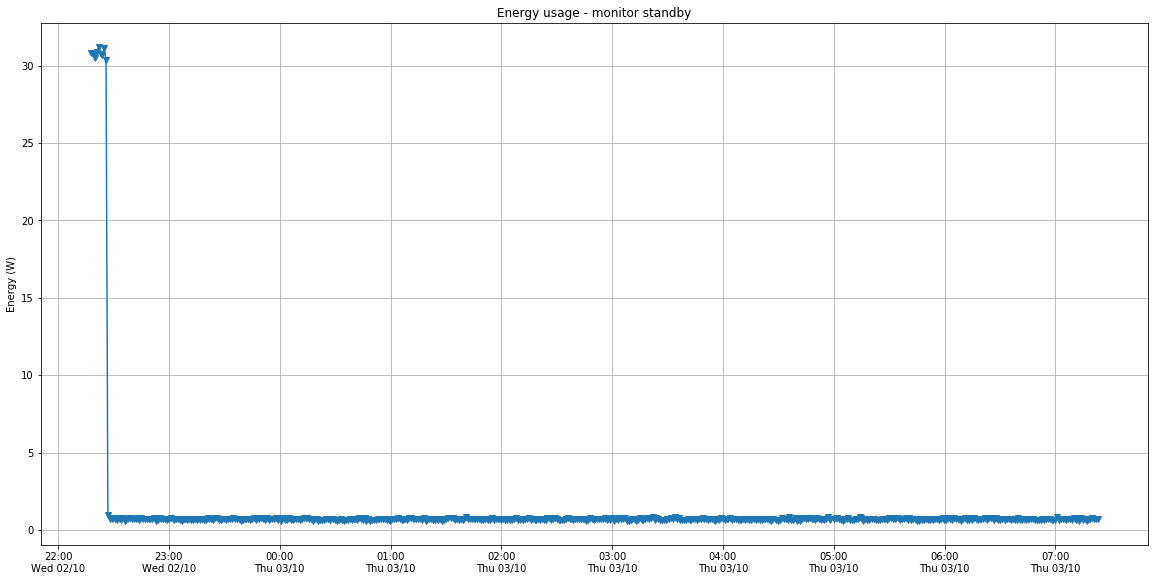

	Device: refrigerator
	Average Pwr: 54.56 W
	Uptime: 7.8 hours
	Total Consumption: 3.28 kWh
	Average Consumption: 0.00701 kWh / min
	Price Estimate: 7.38 kr


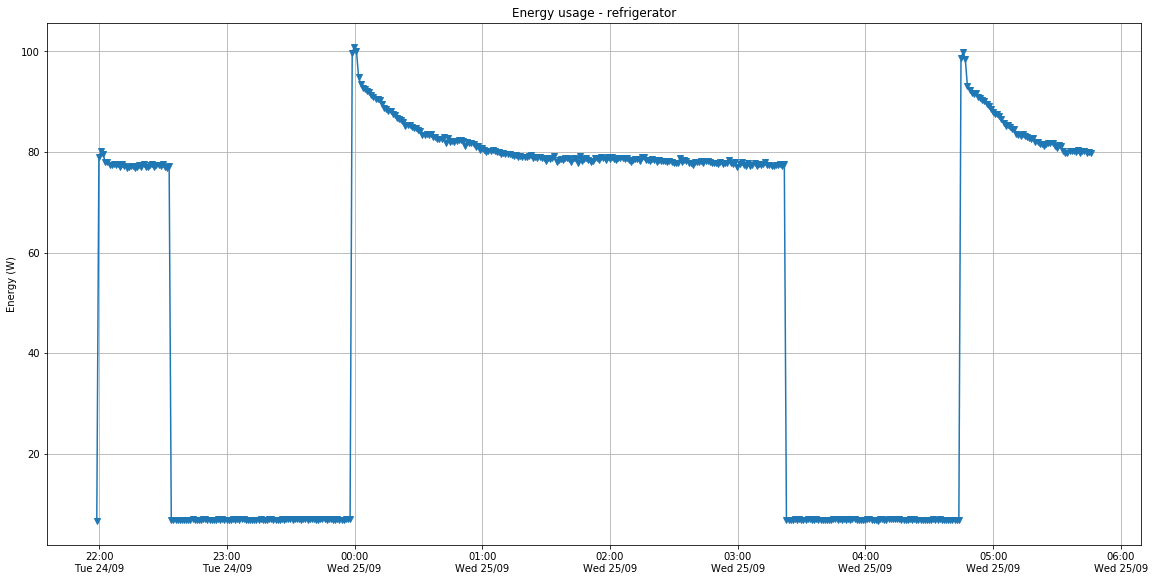

	Device: refrigerator two
	Average Pwr: 63.70 W
	Uptime: 4.3 hours
	Total Consumption: 3.81 kWh
	Average Consumption: 0.01499 kWh / min
	Price Estimate: 8.57 kr


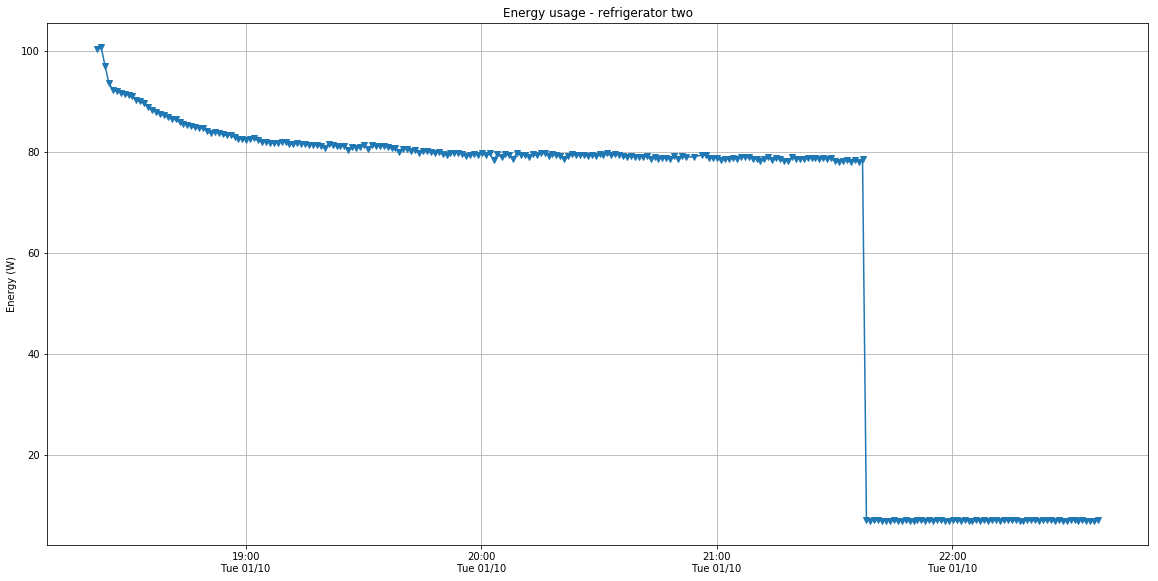

	Device: wifi router SAGEMCOM
	Average Pwr: 11.07 W
	Uptime: 17.1 hours
	Total Consumption: 0.66 kWh
	Average Consumption: 0.00065 kWh / min
	Price Estimate: 1.49 kr


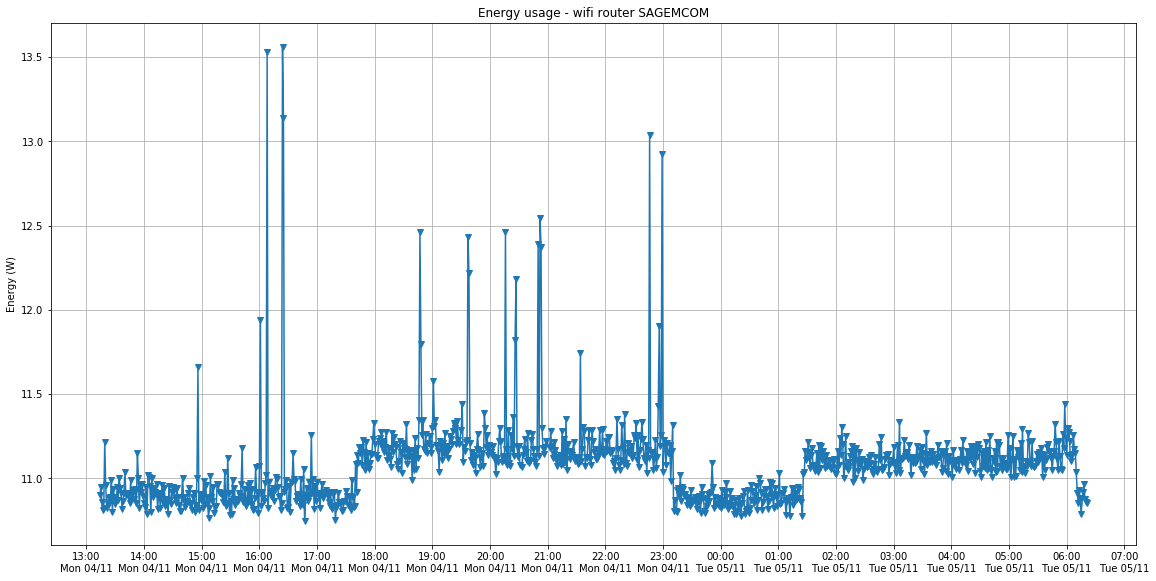

	Device: workstation two monitors
	Average Pwr: 46.46 W
	Uptime: 4.8 hours
	Total Consumption: 2.75 kWh
	Average Consumption: 0.00970 kWh / min
	Price Estimate: 6.18 kr


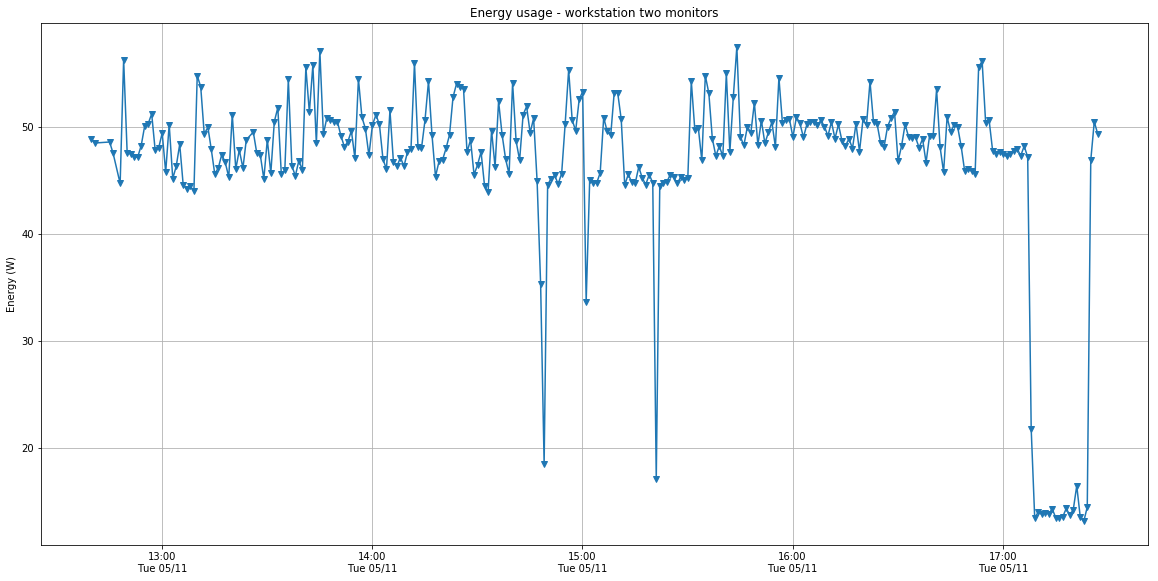

In [58]:
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import time
import datetime

device_names = []
device_dict = dict()
for filename in filenames:
    match = re.search(r'\_[\D]+', filename)
    name = match.group(0)[1:].replace("_", " ").rstrip()
    device_names.append(name)
    print("\tDevice:", name)
    device_dict[name] = {}
    # Extract data from dataframe
    pw = [pw for pw in dfDict[filename][0]]
    ts = [ts for ts in dfDict[filename].index]
    ts_first = dfDict[filename].index[0]
    ts_last = dfDict[filename].index[len(dfDict[filename]) - 1]
    
    # Calculate relevant stats
    time_total = (ts_last - ts_first)  # Diff in milliseconds
    kwh_total = (sum(pw) / (ts_last - ts_first)) * 3600
    kwh_mean = np.mean(pw)
    uptime = time_total / 3600000
    avg_consumption = kwh_total / len(pw)
    price_estimate = kwh_total * 2.25 # 2.25 kr/kWh is roughly / on average danish electricity price
    
    device_dict[name]['avg_consumption'] = avg_consumption
    
    print("\tAverage Pwr: {0:.2f}".format(kwh_mean), "W")
    print("\tUptime: {0:.1f}".format(uptime), "hours")
    print("\tTotal Consumption: {0:.2f}".format(kwh_total), "kWh")
    print("\tAverage Consumption: {0:.5f}".format(avg_consumption), "kWh / min")
    print("\tPrice Estimate: {0:.2f}".format(price_estimate), "kr")
    
    # Format timestamps correctly
    ts_plot = pd.to_datetime(dfDict[filename].index.astype('datetime64[ms]'))

    # Plot the date using plot_date rather than plot
    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot_date(ts_plot, pw, 'v-')
    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%a %d/%m'))
    ax.xaxis.grid(True, which="minor")
    ax.yaxis.grid(True, which="minor")
    plt.tight_layout()
    plt.title("Energy usage - " + name)
    plt.grid()
    plt.ylabel("Energy (W)")
    plt.show()

dict_keys(['kettle', 'lamp living room', 'laptop charger standby ASUS', 'monitor', 'monitor standby', 'refrigerator', 'refrigerator two', 'wifi router SAGEMCOM', 'workstation two monitors'])

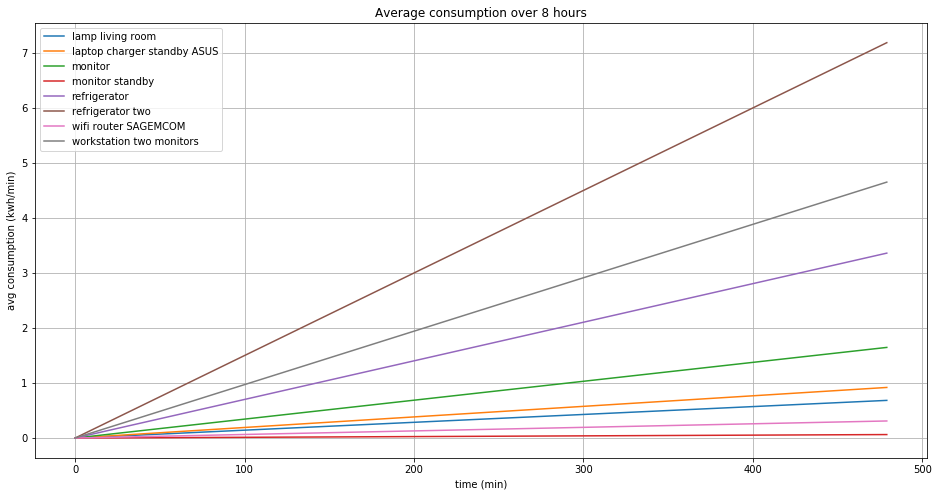

In [60]:
plt.figure(figsize=(16,8))

# Don't plot kettle, because it's not on for 8 hours
for name in device_names[1:]:  
    a = device_dict[name]['avg_consumption']
    x = range(0, 8 * 60)
    y = a * x
    plt.plot(x,y)
    
plt.title("Average consumption over 8 hours")
plt.xlabel("time (min)")
plt.ylabel("avg consumption (kwh/min)")
plt.legend(device_names[1:]) # Exclude kettle 
plt.grid()
plt.show()